In [139]:
%load_ext autoreload
%autoreload 2

import subprocess
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import chess.pgn
from chess import Board, Move, Color
from chess.engine import SimpleEngine, Limit, PovScore
from chesslab.game_score import GameScore
from chesslab.collection import Collection
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
engine = SimpleEngine.popen_uci("../engines/stockfish.exe", creationflags=subprocess.CREATE_NO_WINDOW)

In [236]:
collection = Collection("../data/player.pgn")

In [223]:
collection.compute_scores_and_save(engine, overwrite=True)

game 1
.....................................................................................
118 sec
game 2
..............................................
185 sec
game 3
..........................................
249 sec
game 4
.............................................................................................................................................................
464 sec
game 5
..............................................................................................................
630 sec
game 6
......................................................................................
759 sec
game 7
..................................................
830 sec
game 8
.....................................
877 sec
game 9
............................
920 sec
game 10
....................................................
989 sec
game 11
....................................................
1068 sec
game 12
....................................................
1144 sec
game 1

In [237]:
len(collection.games)

125

In [238]:
seq = []
# user = "Magnus Carlsen"
user = "Player"
for game in collection.games:
    score = None
    if game.headers['White'] == user:
        score = float(game.headers['WhiteScore'])
    if game.headers['Black'] == user:
        score = float(game.headers['BlackScore'])
    if score is None:
        print(game.headers['White'], game.headers['Black'])
        continue

    date = datetime.datetime.strptime(game.headers['Date'], '%Y.%m.%d')
    seq.append((date, score))

seq.sort(key=lambda k:k[0])

In [239]:
df = pd.DataFrame(seq, columns=['date', 'score'])
df.set_index('date', inplace=True)

In [197]:
df_chosen = df[df.score > -100]

In [240]:
len(df)

125

In [209]:
df

,score
date,
2023-08-23,-45.49
2023-08-24,-19.83
2023-08-28,-71.48
2023-08-28,-53.27
2023-08-28,-107.38
...,...
2023-12-27,-15.88
2023-12-27,-52.22
2023-12-28,-104.29


In [241]:
average = df_chosen.resample('M').mean()

In [242]:
average.dropna(inplace=True)
average

,score
date,
2023-08-31,-48.861429
2023-09-30,-44.868000
2023-10-31,-43.695000
2023-11-30,-51.082353
2023-12-31,-49.328919


In [132]:
x, y = zip(*seq)

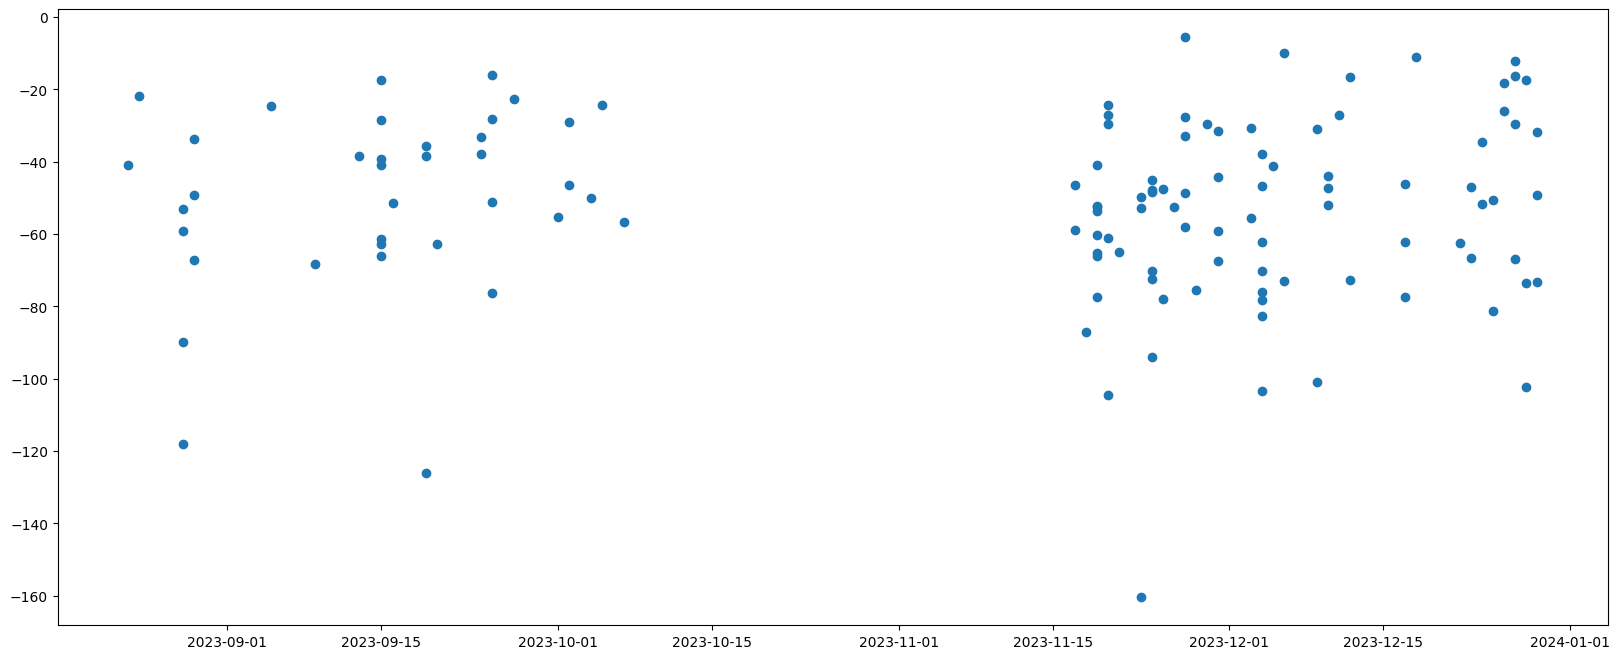

In [227]:
plt.figure(figsize=(20,8))
plt.plot(df.index, df['score'], 'o')
#plt.plot(average.index, average['score'], '-')

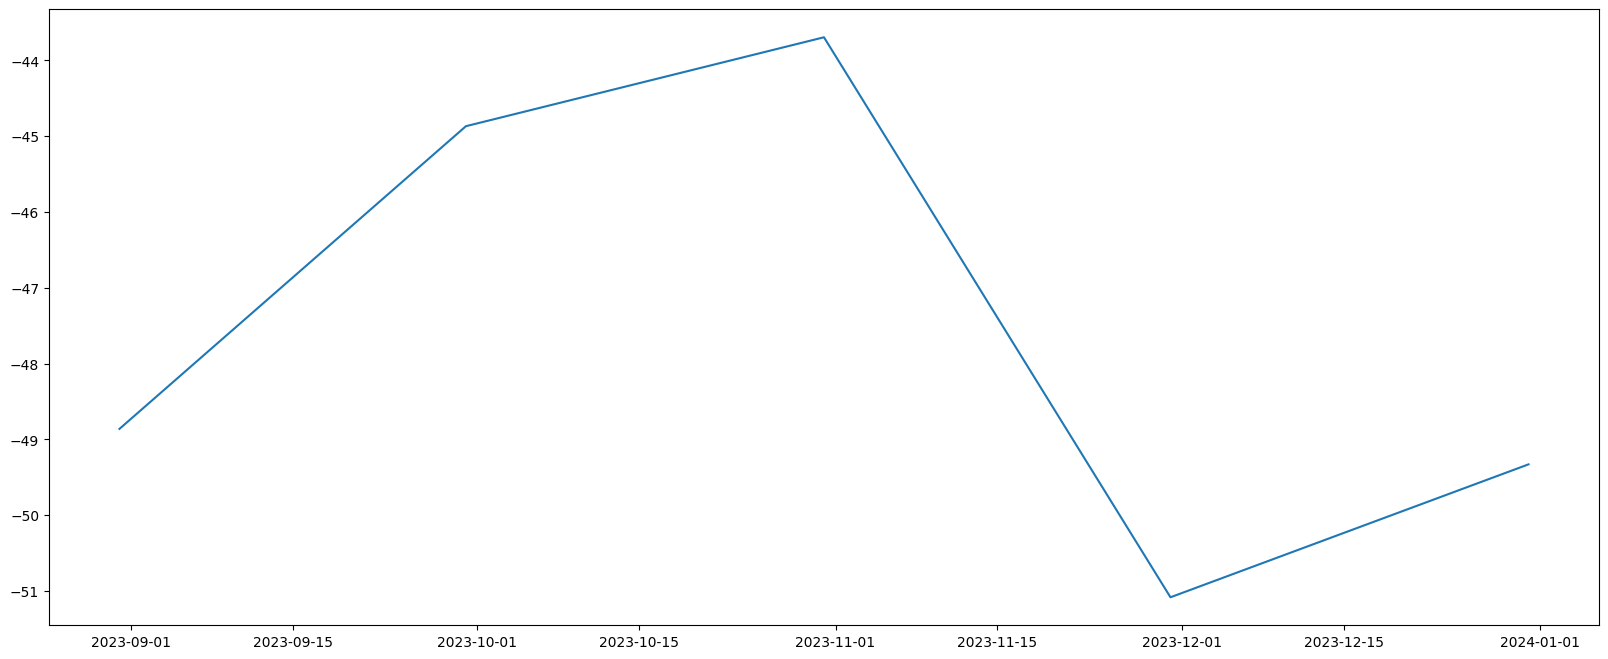

In [235]:
plt.figure(figsize=(20,8))
plt.plot(average.index, average['score'], '-')

In [152]:
from chesslab.game_score import GameScore

In [160]:
gs = GameScore(collection.games[1], engine, Limit(time=0.5))

In [161]:
gs.score()

.............................................................................................................................................................


{'white': -47.12658227848101, 'black': -130.01282051282053}